In [1]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

data_path = 'data_academic_performance.csv'
data = pd.read_csv(data_path)
data = data.drop(columns=['COD_S11', 'Cod_SPro', 'PERCENTILE', '2ND_DECILE', 'QUARTILE', 'Unnamed: 9'])

In [2]:
data

,GENDER,EDU_FATHER,EDU_MOTHER,OCC_FATHER,OCC_MOTHER,STRATUM,SISBEN,PEOPLE_HOUSE,INTERNET,TV,...,ACADEMIC_PROGRAM,QR_PRO,CR_PRO,CC_PRO,ENG_PRO,WC_PRO,FEP_PRO,G_SC,SEL,SEL_IHE
0,F,Incomplete Professional Education,Complete technique or technology,Technical or professional level employee,Home,Stratum 4,It is not classified by the SISBEN,Three,Yes,Yes,...,INDUSTRIAL ENGINEERING,71,93,71,93,79,181,180,2,2
1,F,Complete Secundary,Complete professional education,Entrepreneur,Independent professional,Stratum 5,It is not classified by the SISBEN,Three,Yes,Yes,...,INDUSTRIAL ENGINEERING,97,38,86,98,78,201,182,4,4
2,M,Not sure,Not sure,Independent,Home,Stratum 2,Level 2,Five,No,No,...,ELECTRONIC ENGINEERING,17,1,18,43,22,113,113,1,1
3,F,Not sure,Not sure,Other occupation,Independent,Stratum 2,It is not classified by the SISBEN,Three,Yes,Yes,...,INDUSTRIAL ENGINEERING,65,35,76,80,48,137,157,2,2
4,M,Complete professional education,Complete professional education,Executive,Home,Stratum 4,It is not classified by the SISBEN,One,Yes,Yes,...,INDUSTRIAL ENGINEERING,94,94,98,100,71,189,198,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12406,M,Ninguno,Complete Secundary,Other occupation,Auxiliary or Administrative,Stratum 2,It is not classified by the SISBEN,Six,Yes,Yes,...,MECHATRONICS ENGINEERING,88,71,86,87,65,142,176,2,2
12407,M,Complete professional education,Complete Secundary,Executive,Other occupation,Stratum 2,Level 2,Five,Yes,Yes,...,INDUSTRIAL ENGINEERING,46,39,44,11,0,127,107,4,2
12408,M,Complete technique or technology,Complete technique or technology,Retired,Home,Stratum 2,Level 2,Five,Yes,Yes,...,INDUSTRIAL ENGINEERING,98,88,90,81,87,192,188,2,2
12409,F,Complete professional education,Complete professional education,Independent professional,Small entrepreneur,Stratum 3,It is not classified by the SISBEN,Seven,Yes,Yes,...,CIVIL ENGINEERING,60,80,51,8,42,121,146,3,2


In [3]:
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column].astype(str))
    label_encoders[column] = le
missing_values = data.isnull().sum().sum()

data['G_SC_binned'] = pd.qcut(data['G_SC'], 4, labels=False)

X = data.drop(['G_SC', 'G_SC_binned'], axis=1)
y = data['G_SC_binned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
missing_values, X_train.shape, X_test.shape

(np.int64(0), (9928, 38), (2483, 38))

In [4]:
X_train

,GENDER,EDU_FATHER,EDU_MOTHER,OCC_FATHER,OCC_MOTHER,STRATUM,SISBEN,PEOPLE_HOUSE,INTERNET,TV,...,UNIVERSITY,ACADEMIC_PROGRAM,QR_PRO,CR_PRO,CC_PRO,ENG_PRO,WC_PRO,FEP_PRO,SEL,SEL_IHE
3077,0,4,1,8,4,1,3,2,1,1,...,68,3,84,59,41,58,44,142,2,2
6361,1,11,11,11,11,2,2,3,1,1,...,126,5,91,70,70,75,16,171,4,2
374,0,3,5,3,6,2,2,3,1,1,...,119,5,38,41,36,39,49,129,4,2
2402,0,1,3,6,11,3,2,3,1,1,...,112,13,29,23,45,62,61,61,4,3
9424,0,4,6,11,4,1,2,3,1,1,...,63,13,89,71,60,76,93,100,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4307,0,9,4,0,5,3,2,1,1,1,...,123,13,25,60,63,54,50,156,2,2
5699,1,3,3,11,6,4,2,1,1,1,...,119,14,93,100,91,92,12,170,4,2
10742,1,1,2,8,4,2,3,10,1,0,...,4,5,52,2,56,35,17,132,2,2
537,0,3,3,11,11,3,2,3,1,1,...,71,10,73,59,95,89,86,177,4,2


In [5]:
y_train

,G_SC_binned
3077,1
6361,1
374,0
2402,0
9424,2
...,...
4307,0
5699,3
10742,0
537,2


In [6]:
rf_model = RandomForestClassifier(n_estimators=100)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

Accuracy: 0.8711236407571487
F1 Score: 0.87251266813971


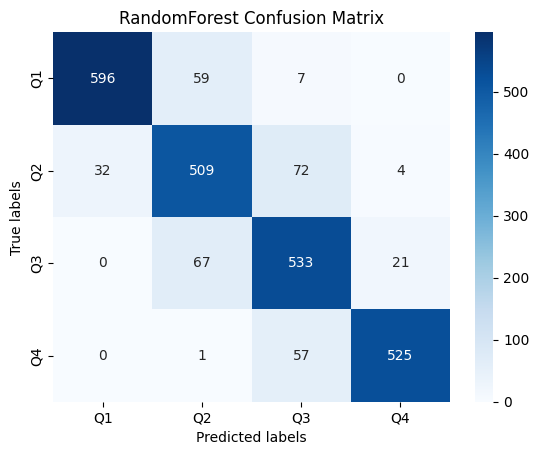

In [7]:
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=(['Q1', 'Q2', 'Q3', 'Q4']), yticklabels=(['Q1', 'Q2', 'Q3', 'Q4']))
plt.title('RandomForest Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.show()

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=4)

knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

accuracy_knn, f1_knn

(0.7410390656463954, 0.7414491541468816)

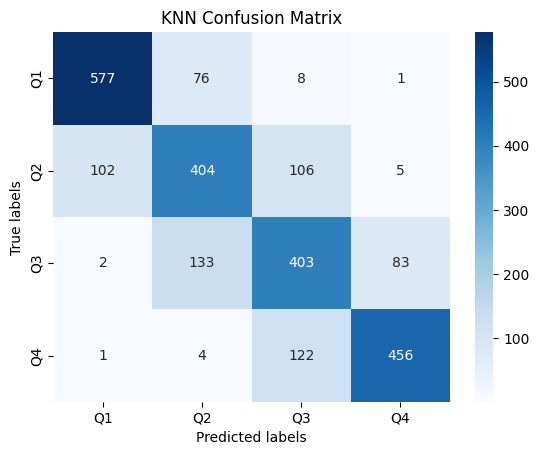

In [9]:
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", xticklabels=(['Q1', 'Q2', 'Q3', 'Q4']), yticklabels=(['Q1', 'Q2', 'Q3', 'Q4']))
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.show()

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
gml_boost = GradientBoostingClassifier(random_state=7)

gml_boost.fit(X_train, y_train)

y_pred_gml_boost = gml_boost.predict(X_test)
accuracy_gml_boost = accuracy_score(y_test, y_pred_gml_boost)
f1_gml_boost = f1_score(y_test, y_pred_gml_boost, average='weighted')
conf_matrix_gmlboost = confusion_matrix(y_test, y_pred_gml_boost)

accuracy_gml_boost, f1_gml_boost

(0.9343536045106726, 0.9348361606348347)

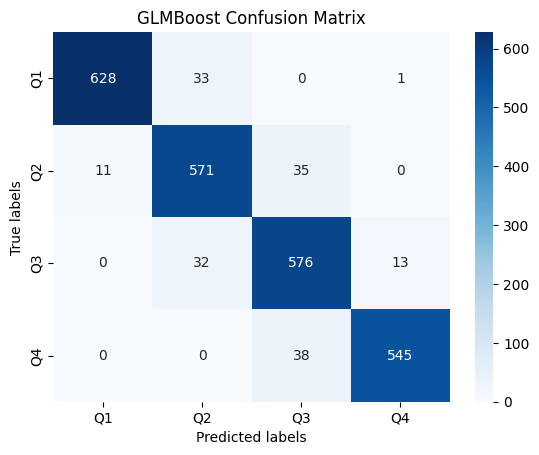

In [11]:
sns.heatmap(conf_matrix_gmlboost, annot=True, fmt="d", cmap="Blues", xticklabels=(['Q1', 'Q2', 'Q3', 'Q4']), yticklabels=(['Q1', 'Q2', 'Q3', 'Q4']))
plt.title('GLMBoost Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.show()

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV

glmnet = Pipeline([
    ('scaler', StandardScaler()),
    ('logregcv', LogisticRegressionCV(cv=5, max_iter=1000, solver='saga', n_jobs=-1))
])

glmnet.fit(X_train, y_train)

y_pred_glmnet = glmnet.predict(X_test)

accuracy_glmnet = accuracy_score(y_test, y_pred_glmnet)
f1_glmnet = f1_score(y_test, y_pred_glmnet, average='weighted')
conf_matrix_glmnet = confusion_matrix(y_test, y_pred_glmnet)
accuracy_glmnet, f1_glmnet

(0.9109947643979057, 0.9112442170444714)

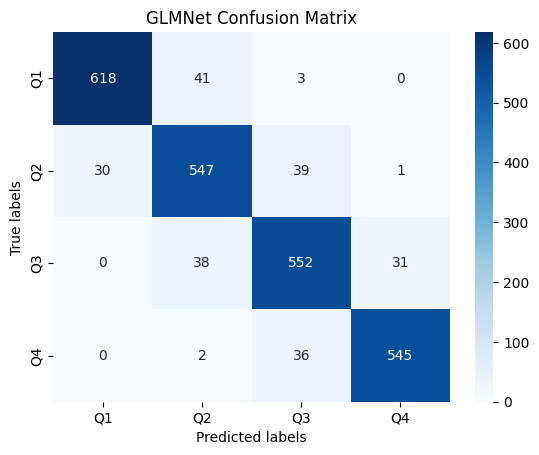

In [13]:
sns.heatmap(conf_matrix_glmnet, annot=True, fmt="d", cmap="Blues", xticklabels=(['Q1', 'Q2', 'Q3', 'Q4']), yticklabels=(['Q1', 'Q2', 'Q3', 'Q4']))
plt.title('GLMNet Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.show()

In [14]:
from sklearn.svm import SVC

svm_model = SVC(probability=True, random_state=7)

svm_model.fit(X_train,y_train)

y_pred_svm_model = svm_model.predict(X_test)
accuracy_svm_model = accuracy_score(y_test, y_pred_svm_model)
f1_svm_model = f1_score(y_test, y_pred_svm_model, average='weighted')
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm_model)

accuracy_svm_model, f1_svm_model

(0.7801047120418848, 0.784537350725677)

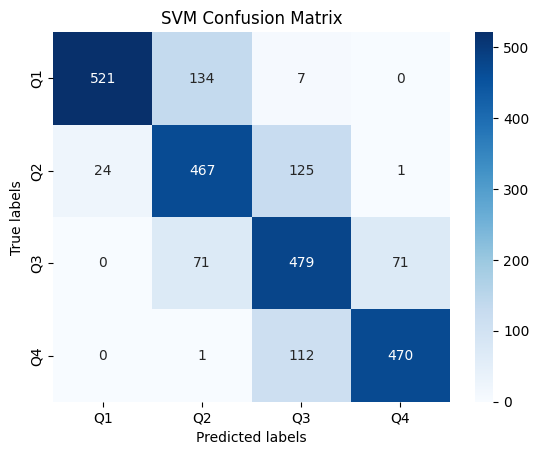

In [15]:
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", xticklabels=(['Q1', 'Q2', 'Q3', 'Q4']), yticklabels=(['Q1', 'Q2', 'Q3', 'Q4']))
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.show()

In [16]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=7)

dt_model.fit(X_train, y_train)

y_pred_dt_model = dt_model.predict(X_test)
accuracy_dt_model = accuracy_score(y_test, y_pred_dt_model)
f1_dt_model = f1_score(y_test, y_pred_dt_model, average='weighted')
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt_model)

accuracy_dt_model, f1_dt_model

(0.8099073701167941, 0.8105809245364816)

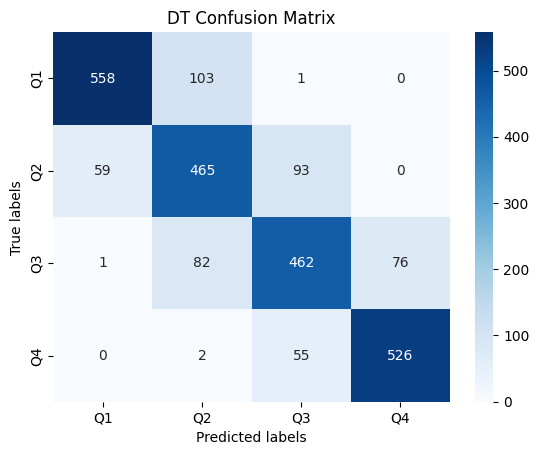

In [17]:
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues", xticklabels=(['Q1', 'Q2', 'Q3', 'Q4']), yticklabels=(['Q1', 'Q2', 'Q3', 'Q4']))
plt.title('DT Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.show()

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Define the 1D CNN model
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')  # Assuming 4 classes since 'G_SC_binned' is in 4 categories
])

# Reshape the data for the 1D CNN
X_train_cnn = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

# Create and compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = cnn_model.fit(X_train_cnn, y_train, epochs=20, validation_data=(X_test_cnn, y_test))

# Evaluate the model
test_loss, test_acc = cnn_model.evaluate(X_test_cnn, y_test)
print(f"Test Accuracy: {test_acc}")

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


311/311 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.3729 - loss: 12.9462 - val_accuracy: 0.5079 - val_loss: 3.4289
Epoch 2/20
311/311 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5732 - loss: 1.8889 - val_accuracy: 0.7056 - val_loss: 0.6479
Epoch 3/20
311/311 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6379 - loss: 1.2149 - val_accuracy: 0.6975 - val_loss: 0.7481
Epoch 4/20
311/311 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.6957 - loss: 0.8048 - val_accuracy: 0.6492 - val_loss: 0.9986
Epoch 5/20
311/311 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6882 - loss: 0.8808 - val_accuracy: 0.7567 - val_loss: 0.5220
Epoch 6/20
311/311 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.7490 - loss: 0.6201 - val_accuracy: 0.7092 - val_loss: 0.7034
Epoch 7/20
311/311 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7724 - loss: 0.5727 - val_accuracy: 0.7894 - val_loss: 0.4581
Epoch 8/20
311/311 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.7844 - loss: 0.5183 - val_accuracy: 0.78

78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


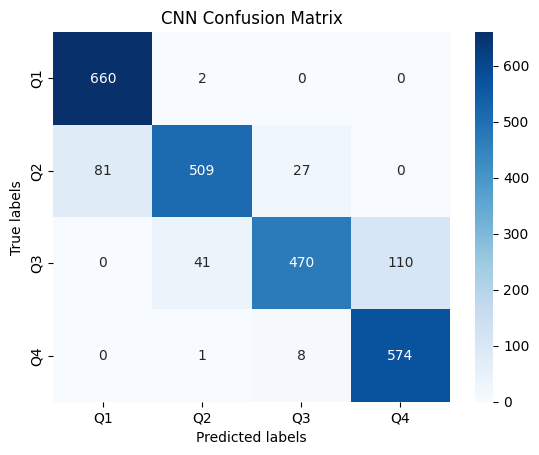

In [19]:
import numpy as np

y_pred = cnn_model.predict(X_test_cnn)
y_pred_labels = np.argmax(y_pred, axis=1)
accuracy_cnn_model = accuracy_score(y_test, y_pred_labels)
f1_cnn_model = f1_score(y_test, y_pred_labels, average='weighted')
accuracy_cnn_model, f1_cnn_model
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=(['Q1', 'Q2', 'Q3', 'Q4']), yticklabels=(['Q1', 'Q2', 'Q3', 'Q4']))
plt.title('CNN Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.show()

In [20]:
from sklearn.metrics import classification_report


classification_report_rf = classification_report(y_test, rf_model.predict(X_test), target_names=['Q1', 'Q2', 'Q3', 'Q4'])

classification_report_knn = classification_report(y_test, knn_model.predict(X_test), target_names=['Q1', 'Q2', 'Q3', 'Q4'])

classification_report_gml_boost = classification_report(y_test, gml_boost.predict(X_test), target_names=['Q1', 'Q2', 'Q3', 'Q4'])

classification_report_glmnet = classification_report(y_test, glmnet.predict(X_test), target_names=['Q1', 'Q2', 'Q3', 'Q4'])

classification_report_svm = classification_report(y_test, svm_model.predict(X_test), target_names=['Q1', 'Q2', 'Q3', 'Q4'])

classification_report_dt = classification_report(y_test, dt_model.predict(X_test), target_names=['Q1', 'Q2', 'Q3', 'Q4'])

classification_report_cnn = classification_report(y_test, y_pred_labels, target_names=['Q1', 'Q2', 'Q3', 'Q4'])

classification_reports = {
    "RandomForest": classification_report_rf,
    "KNN": classification_report_knn,
    "GMLBoost": classification_report_gml_boost,
    "GLMNet": classification_report_glmnet,
    "SVM": classification_report_svm,
    "DecisionTree": classification_report_dt,
    "CNN" : classification_report_cnn
}

print(classification_reports["RandomForest"])

for model_name, report in classification_reports.items():
    with open(f'classification_report_{model_name}.txt', 'w') as text_file:
        text_file.write(report)

classification_reports_paths = {
    model_name: f'classification_report_{model_name}.txt'
    for model_name in classification_reports
}

classification_reports_paths

              precision    recall  f1-score   support

          Q1       0.95      0.90      0.92       662
          Q2       0.80      0.82      0.81       617
          Q3       0.80      0.86      0.83       621
          Q4       0.95      0.90      0.93       583

    accuracy                           0.87      2483
   macro avg       0.88      0.87      0.87      2483
weighted avg       0.88      0.87      0.87      2483



{'RandomForest': 'classification_report_RandomForest.txt',
 'KNN': 'classification_report_KNN.txt',
 'GMLBoost': 'classification_report_GMLBoost.txt',
 'GLMNet': 'classification_report_GLMNet.txt',
 'SVM': 'classification_report_SVM.txt',
 'DecisionTree': 'classification_report_DecisionTree.txt',
 'CNN': 'classification_report_CNN.txt'}

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


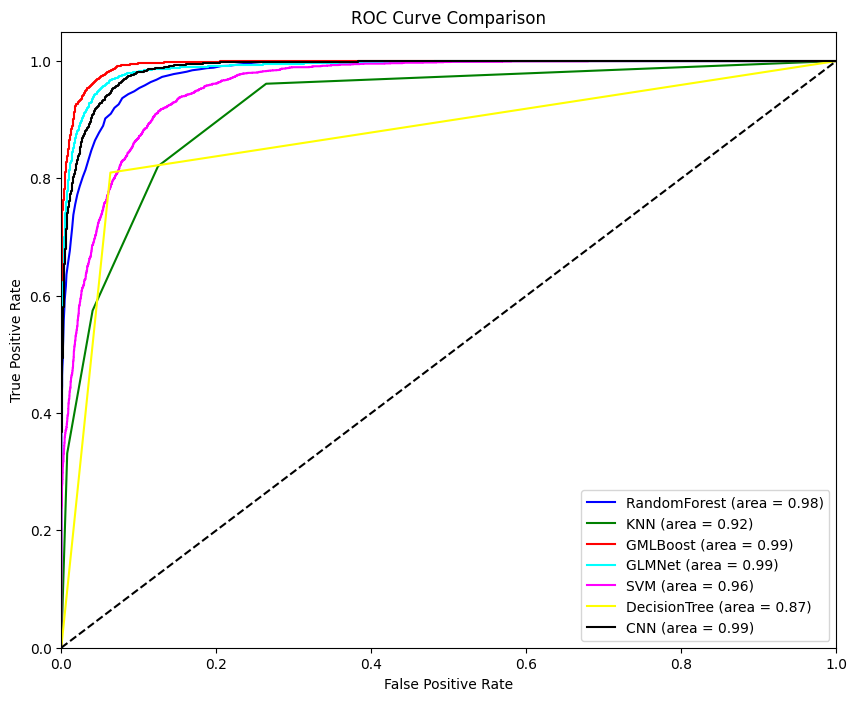

In [21]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
from numpy import interp

y_bin = label_binarize(y, classes=[0, 1, 2, 3])
n_classes = y_bin.shape[1]

y_train_bin = label_binarize(y_train, classes=[0, 1, 2, 3])
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])

# Models dictionary (make sure these models are trained before running this code)
models = {
    'RandomForest': rf_model,
    'KNN': knn_model,
    'GMLBoost': gml_boost,
    'GLMNet': glmnet,
    'SVM': svm_model,
    'DecisionTree': dt_model,
    'CNN': cnn_model
}

# Function to compute ROC and AUC
def compute_roc_auc(model, X_test, y_test_bin):
    y_score = model.predict_proba(X_test)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    return fpr, tpr, roc_auc

# Dictionary to store ROC and AUC values
model_predictions = {}

# Compute ROC and AUC for each model
for name, model in models.items():
    if name == 'SVM':
        model_predictions[name] = compute_roc_auc(model, X_test, y_test_bin)
    elif name == 'CNN':
        # Handle CNN separately
        y_score = cnn_model.predict(X_test_cnn)
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
        model_predictions[name] = (fpr, tpr, roc_auc)
    else:
        model_predictions[name] = compute_roc_auc(model, X_test, y_test_bin)

# Plot ROC Curves
plt.figure(figsize=(10, 8))
colors = iter(['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'lightblue', 'lightgreen'])
for name, (fpr, tpr, roc_auc) in model_predictions.items():
    plt.plot(fpr["micro"], tpr["micro"], label=f'{name} (area = {roc_auc["micro"]:.2f})', color=next(colors))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

In [22]:
import pandas as pd

model_performance = {
    "Model": ["RandomForest", "KNN", "GMLBoost", "GLMNet", "SVM", "DecisionTree", "CNN"],
    "Accuracy": [accuracy, accuracy_knn, accuracy_gml_boost, accuracy_glmnet, accuracy_svm_model, accuracy_dt_model, accuracy_cnn_model],
    "F1 Score": [f1, f1_knn, f1_gml_boost, f1_glmnet, f1_svm_model, f1_dt_model, f1_cnn_model]
}

performance_df = pd.DataFrame(model_performance)

print(performance_df)

          Model  Accuracy  F1 Score
0  RandomForest  0.871124  0.872513
1           KNN  0.741039  0.741449
2      GMLBoost  0.934354  0.934836
3        GLMNet  0.910995  0.911244
4           SVM  0.780105  0.784537
5  DecisionTree  0.809907  0.810581
6           CNN  0.891261  0.888579


In [23]:
top_n = 15

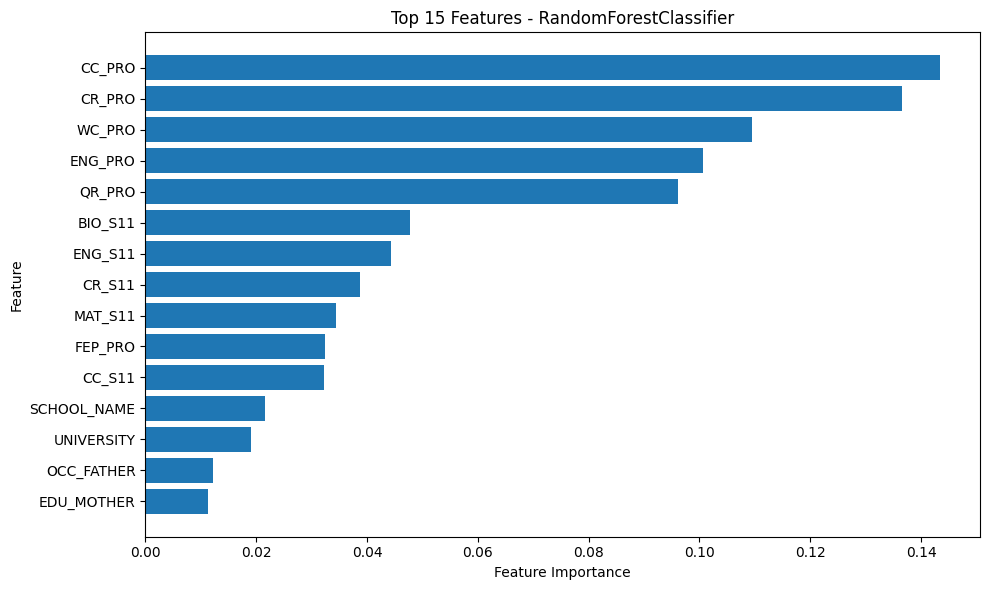

In [24]:
rf_importances = rf_model.feature_importances_
rf_feature_names = X_train.columns
rf_indices = np.argsort(rf_importances)[::-1][:top_n]

plt.figure(figsize=(10, 6))
plt.barh(rf_feature_names[rf_indices], rf_importances[rf_indices])
plt.title(f'Top {top_n} Features - RandomForestClassifier')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

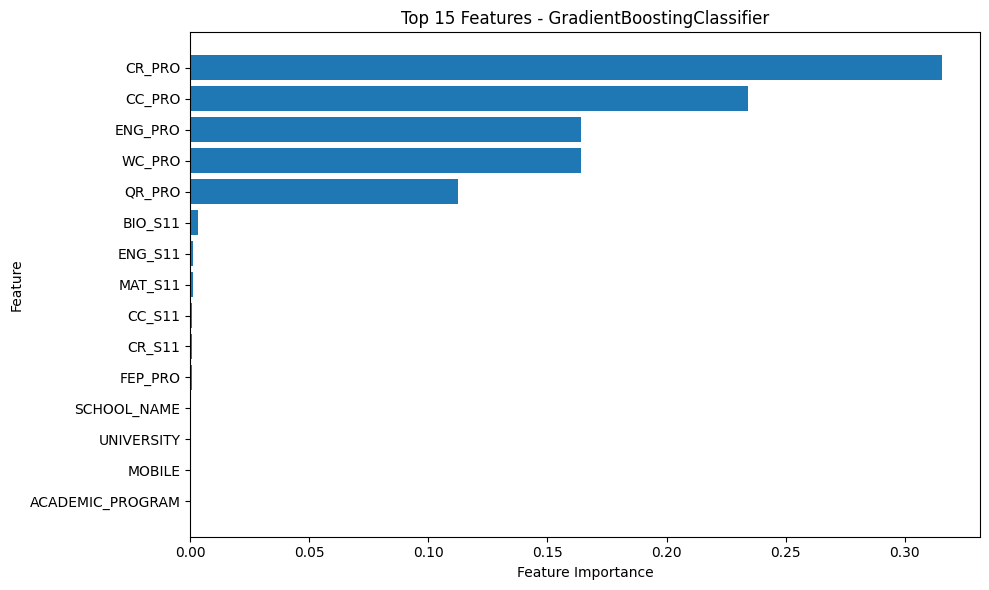

In [25]:
gml_boost_importances = gml_boost.feature_importances_
gml_boost_feature_names = X_train.columns
gml_boost_indices = np.argsort(gml_boost_importances)[::-1][:top_n]

plt.figure(figsize=(10, 6))
plt.barh(gml_boost_feature_names[gml_boost_indices], gml_boost_importances[gml_boost_indices])
plt.title(f'Top {top_n} Features - GradientBoostingClassifier')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

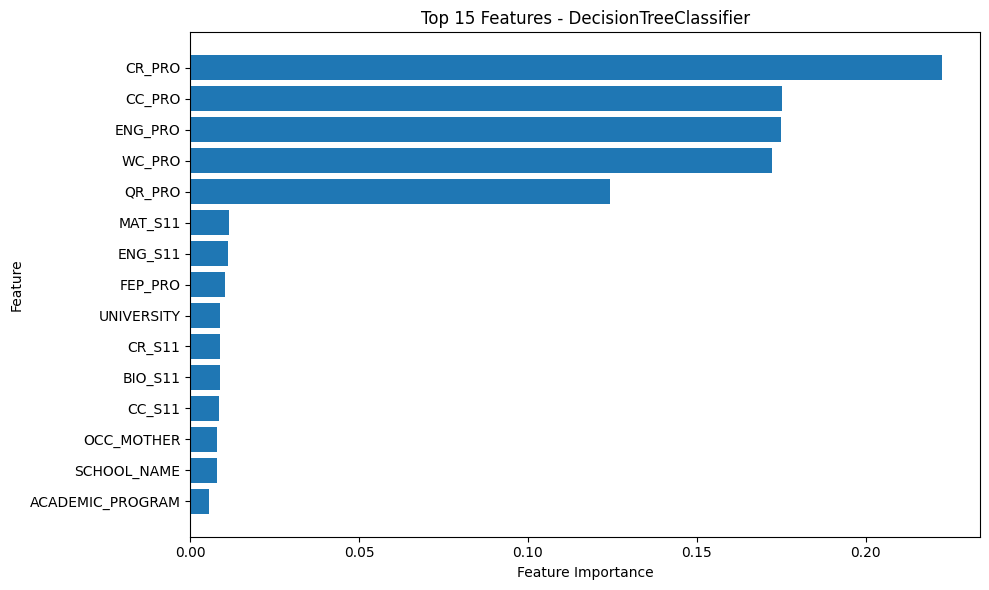

In [26]:
dt_importances = dt_model.feature_importances_
dt_feature_names = X_train.columns
dt_indices = np.argsort(dt_importances)[::-1][:top_n]

plt.figure(figsize=(10, 6))
plt.barh(dt_feature_names[dt_indices], dt_importances[dt_indices])
plt.title(f'Top {top_n} Features - DecisionTreeClassifier')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

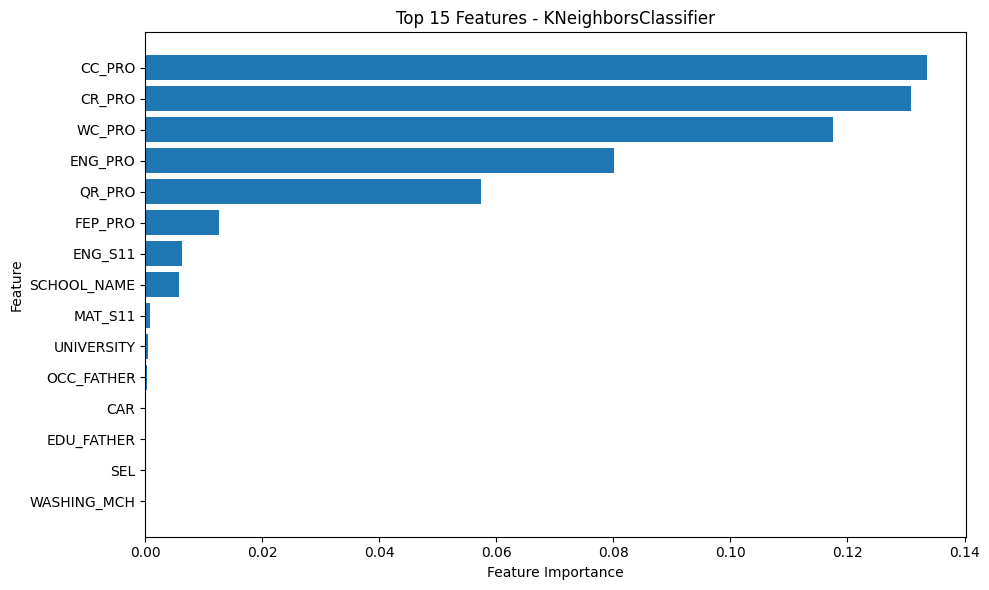

In [27]:
from sklearn.inspection import permutation_importance
knn_importances = permutation_importance(knn_model, X_test, y_test, n_repeats=10, random_state=7)
knn_indices = np.argsort(knn_importances.importances_mean)[::-1][:top_n]

plt.figure(figsize=(10, 6))
plt.barh(rf_feature_names[knn_indices], knn_importances.importances_mean[knn_indices])
plt.title(f'Top {top_n} Features - KNeighborsClassifier')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

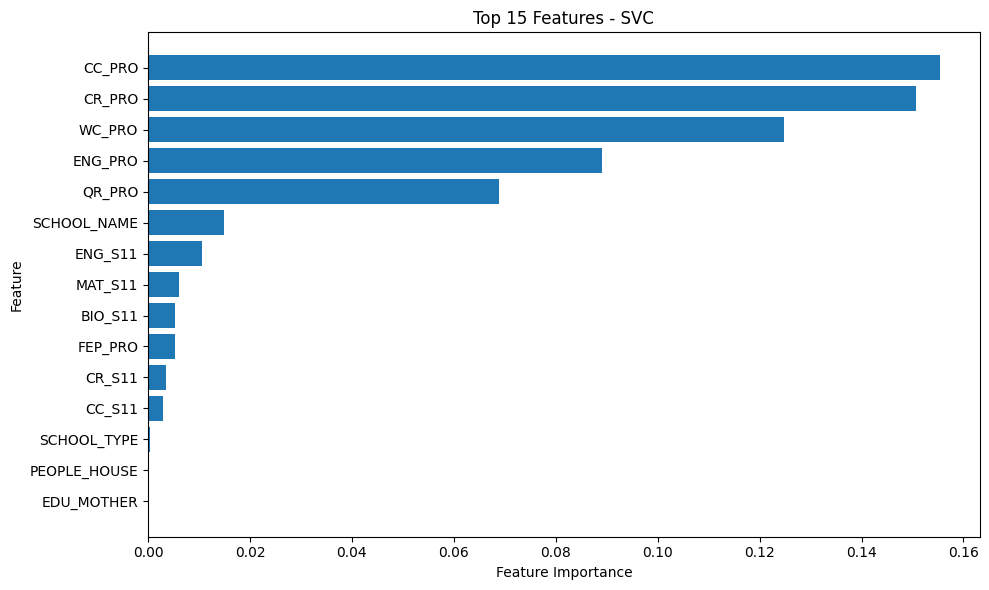

In [28]:
svm_importances = permutation_importance(svm_model, X_test, y_test, n_repeats=10, random_state=7)
svm_indices = np.argsort(svm_importances.importances_mean)[::-1][:top_n]

plt.figure(figsize=(10, 6))
plt.barh(rf_feature_names[svm_indices], svm_importances.importances_mean[svm_indices])
plt.title(f'Top {top_n} Features - SVC')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

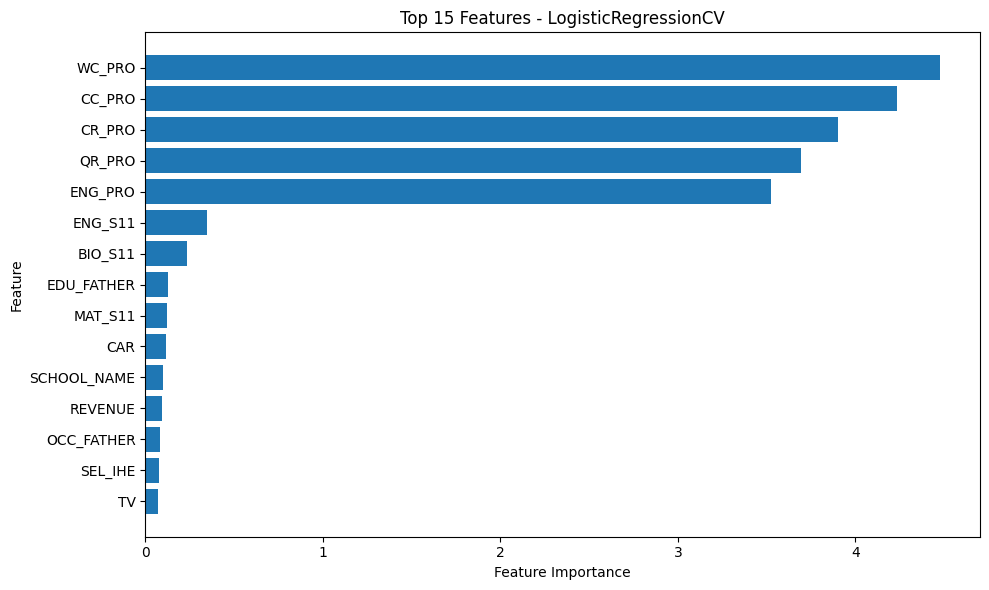

In [29]:
glmnet_importances = abs(glmnet.named_steps['logregcv'].coef_[0])
glmnet_indices = np.argsort(glmnet_importances)[::-1][:top_n]

plt.figure(figsize=(10, 6))
plt.barh(rf_feature_names[glmnet_indices], glmnet_importances[glmnet_indices])
plt.title(f'Top {top_n} Features - LogisticRegressionCV')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

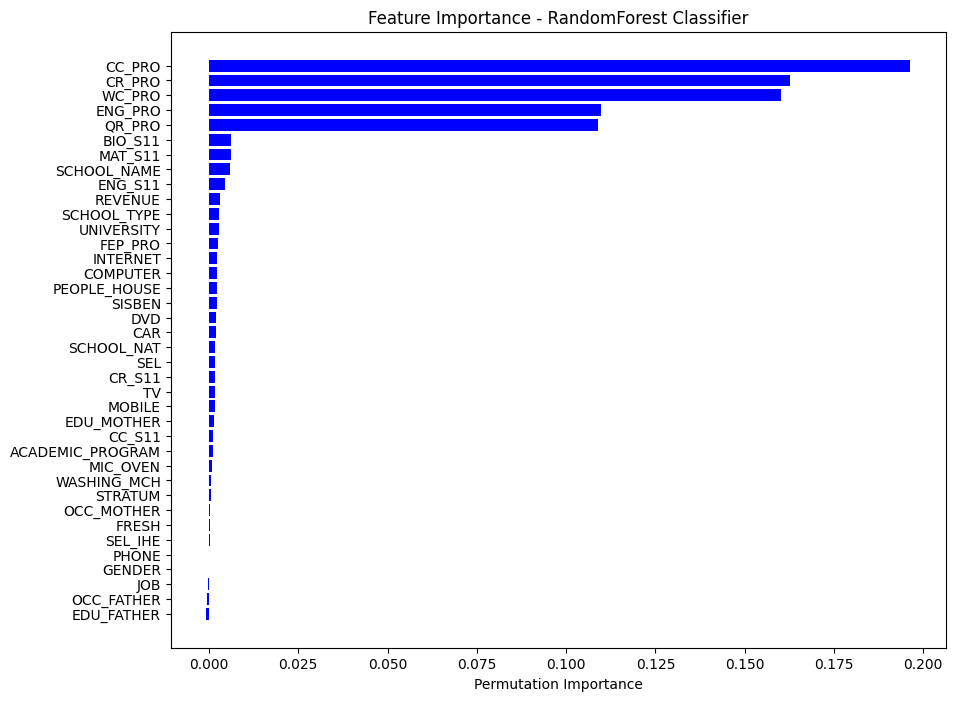

In [30]:
from sklearn.inspection import permutation_importance

result = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=7)

sorted_idx = result.importances_mean.argsort()

importances_sorted = result.importances_mean[sorted_idx]
features_sorted = np.array(X_train.columns)[sorted_idx]

plt.figure(figsize=(10, 8))
plt.barh(range(len(importances_sorted)), importances_sorted, color='blue', align='center')
plt.yticks(range(len(importances_sorted)), features_sorted)
plt.xlabel("Permutation Importance")
plt.title("Feature Importance - RandomForest Classifier")
plt.show()


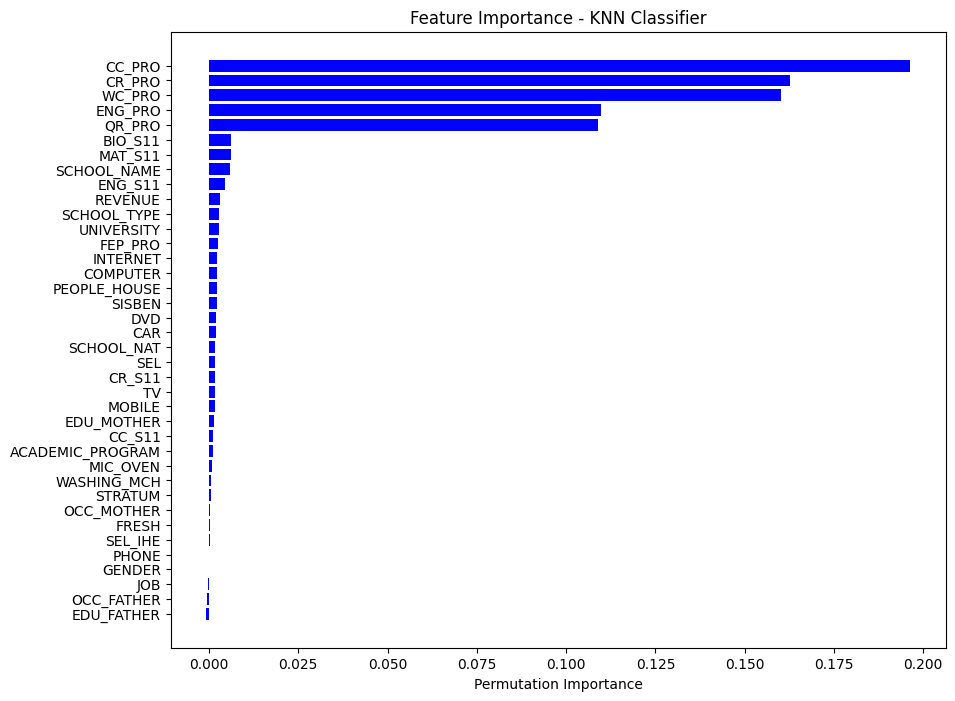

In [31]:
sorted_idx = result.importances_mean.argsort()

importances_sorted = result.importances_mean[sorted_idx]
features_sorted = np.array(X_train.columns)[sorted_idx]

plt.figure(figsize=(10, 8))
plt.barh(range(len(importances_sorted)), importances_sorted, color='blue', align='center')
plt.yticks(range(len(importances_sorted)), features_sorted)
plt.xlabel("Permutation Importance")
plt.title("Feature Importance - KNN Classifier")
plt.show()

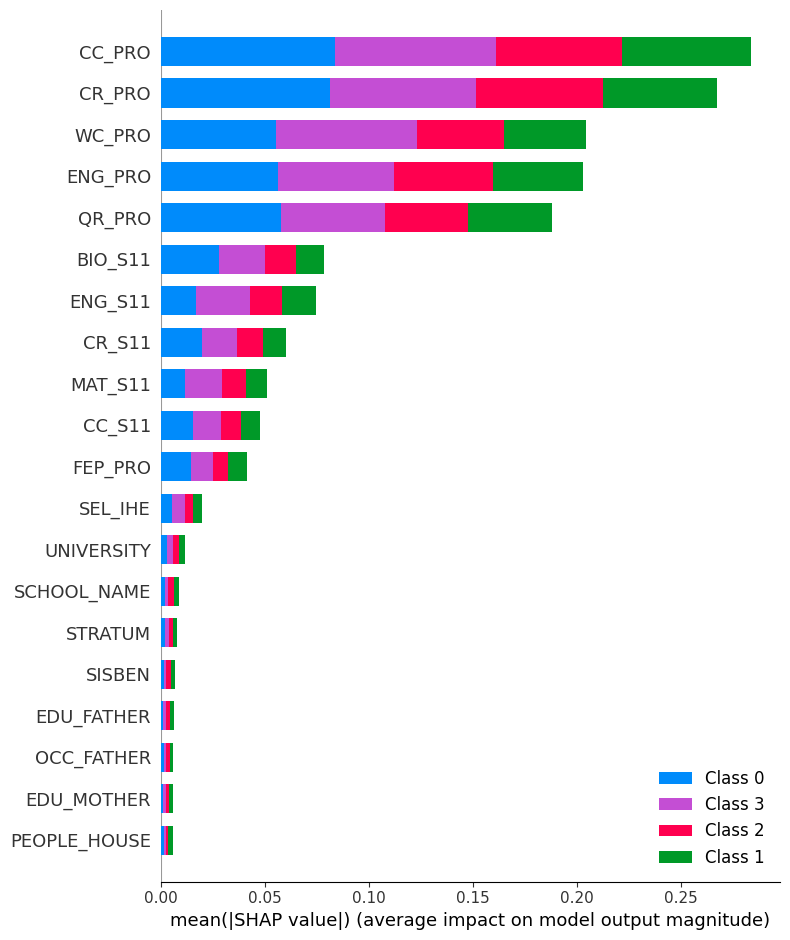

In [32]:
import shap

explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X_test.columns)

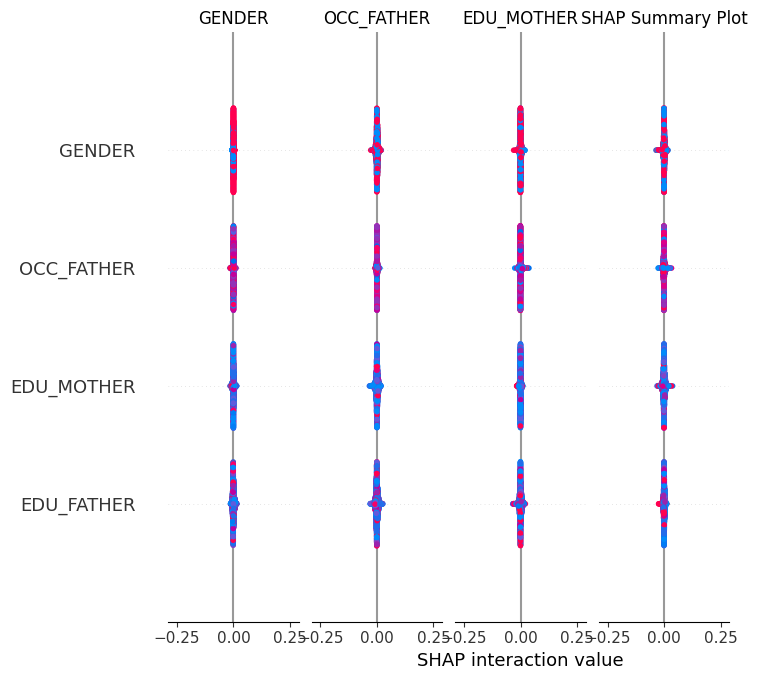

In [33]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, feature_names=X.columns, class_names=['Q1', 'Q2', 'Q3', 'Q4'], show=False)
plt.title('SHAP Summary Plot')
plt.show()

In [34]:
X_test.shape

(2483, 38)

In [35]:
shap_values.shape

(2483, 38, 4)

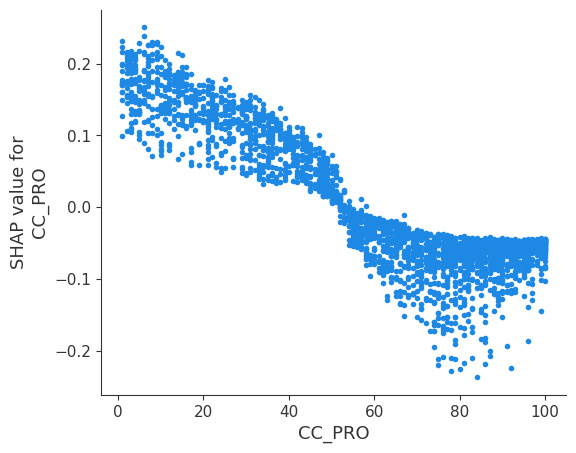

In [36]:
feature_name = 'CC_PRO'
shap.dependence_plot(feature_name, shap_values[..., 0], X_test, interaction_index=None)

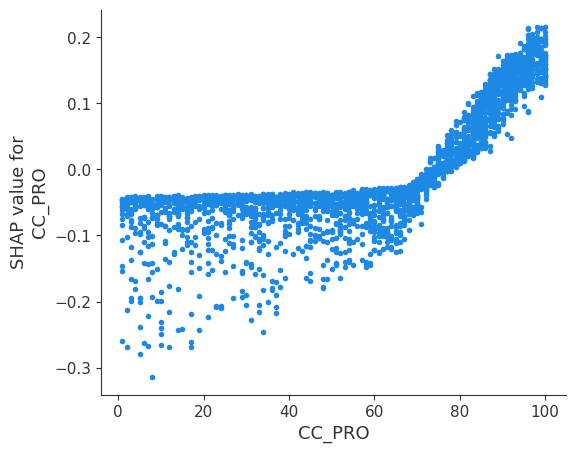

In [37]:
feature_name = 'CC_PRO'
shap.dependence_plot(feature_name, shap_values[..., 3], X_test, interaction_index=None)

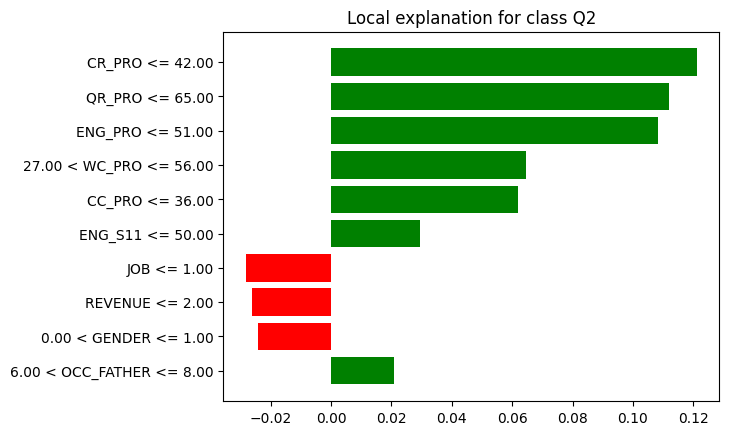

In [38]:
%pip install lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['Q1', 'Q2', 'Q3', 'Q4'],
    mode='classification'
)

instance_index = 7
instance = X_test.iloc[instance_index]

exp = explainer.explain_instance(
    data_row=instance,
    predict_fn=glmnet.predict_proba
)
exp.as_pyplot_figure()
plt.show()